# Real Estate Listings Analysis


We have access to the data from Яндекс.Недвижимость (Yandex.RealEstate), which includes a collection of real estate sale listings in Saint Petersburg and neighboring areas over several years. Our task is to establish parameters for determining the market value of properties that will be used in an automated system. This system will help track anomalies and fraudulent activities.

For each apartment on sale, there are two types of data available. The first type is filled in by the user, while the second type is automatically obtained based on cartographic data, such as the distance to the city center, airport, nearest park, and water body.

In this study, our primary focus is on data preparation. We will partially fill in the missing values in the dataset based on available data, handle duplicates, and change the data type of certain metrics. In Section 3, we will add new metrics to help answer the research questions. We will then dive into key listing parameters, including the speed of property sales and the factors that most influence the property's price. In Sections 4.5 and 4.6, we will calculate the average price per square meter for 10 frequently occurring locations in the dataset and examine how the property prices in Saint Petersburg correlate with the distance from the city center. In Section 5, we will summarize the results of our research.  

### Let's open the data file and explore the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

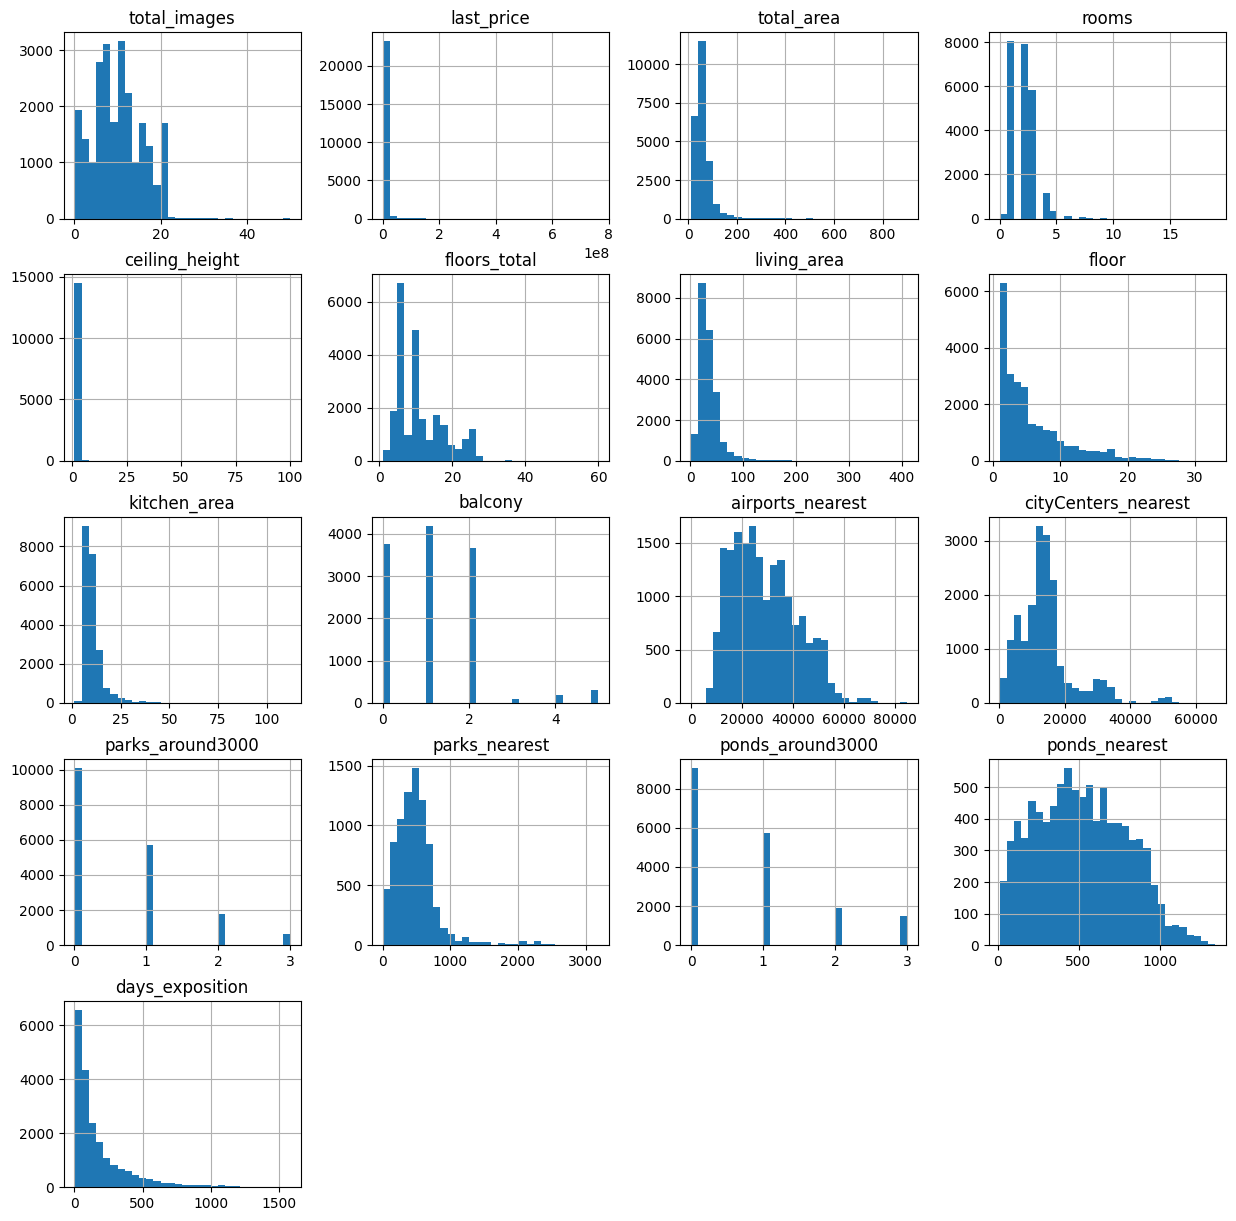

In [4]:
data.hist(bins=30, figsize=(15, 15))

In [5]:
data.duplicated().sum()

0

There is a significant number of missing values in the data, especially in columns like 'is_apartment,' 'balcony,' 'parks_nearest,' and 'ponds_nearest.' Additionally, it is evident that some columns need data type transformation, such as 'first_day_exposition.' No explicit duplicates were found. The graphs also indicate that there are outliers in the columns 'last_price,' 'ceiling_height,' and the area metrics, with values sharply exceeding the majority of the data.


### Data Preprocessing

#### Column Renaming

We will rename the columns to a consistent style (snake case).

In [6]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Data type conversions

In [7]:
# converting the publication date data to the datetime format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
# converting the prices to the integer format
data['last_price'] = data[data['last_price'].notnull()]['last_price'].astype('int')
# rounding the living area values for convenience
data['living_area'] = data[data['living_area'].notnull()]['living_area'].round(2)
# checking for the changes in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Processing missing values

In [8]:
# missing values percent by column
data.isna().mean().round(4) * 100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_centers_nearest    23.29
parks_around_3000       23.28
parks_nearest           65.91
ponds_around_3000       23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

**Reasons that could lead to missing data**: I assume that most of the missing values are in non-mandatory fields. Missing values in balcony and kitchen area could be due to their absence in the apartment (e.g., studio apartments may not have a separate kitchen). The large number of missing values in the 'is_apartment' column may be due to ambiguity in its definition in the Russian language, and some owners of regular apartments may have ignored this field. It is uncertain how 'days_exposition' was calculated, as it could be empty for apartments that were listed for less than 1 day or for ads that were still active at the time of data extraction.



There is a small number of missing values in 'locality_name' and 'floors_total'. Since these data are difficult to restore, we will remove these rows.

In [9]:
# removing rows with unknown values in locality_name and floors_total
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Let's assume that apartments with missing values in 'balcony' column have no balconies and replace these missing values with zeroes.

In [10]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

We assume that the kitchen area for studios and open-plan spaces is included in the total area. We will also consider apartments without a separate kitchen as properties with 0 kitchen area, as they are legally considered commercial properties, for example, hotel rooms. We will replace the missing values in these columns with 0.

In [11]:
data.loc[(data['kitchen_area'].isna()) & ((data['studio'] == True) | (data['open_plan'] == True) | (data['is_apartment'] == True)), 'kitchen_area'] = 0

Filling in the missing values in the ceiling height based on the median values of the ceiling height for each floor.

In [12]:
for floor in data['floors_total'].unique():
    data.loc[(data['floors_total'] == floor) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == floor) & ~(data['ceiling_height'].isna()), 'ceiling_height'].median()

Calculating the mean ratios of living area and kitchen area to the total area.

In [13]:
# replacing the missing values in total area and kitchen area
living_area_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_area__ratio = data['kitchen_area'].mean() / data['total_area'].mean()

data['living_area'] = data['living_area'].fillna(living_area_ratio * data['total_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area__ratio * data['total_area'])

In [14]:
# checking missing values ratio again
data.isna().mean().round(4) * 100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height           0.00
floors_total             0.00
living_area              0.00
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             0.00
balcony                  0.00
locality_name            0.00
airports_nearest        23.44
city_centers_nearest    23.34
parks_around_3000       23.34
parks_nearest           65.92
ponds_around_3000       23.34
ponds_nearest           61.65
days_exposition         13.46
dtype: float64

####  Processing duplicates

We can see in the list of unique locality names that several variants are used to refer to "settlements." Let's replace all of them with "посёлок" (settlement).

In [15]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [16]:
# total number of unique values
len(data['locality_name'].unique())

364

In [17]:
# unification of locality names
data['location'] = data['locality_name']

for l in ['городской посёлок', 'городской поселок', 'поселок городского типа', 'посёлок городского типа', 'посёлок при железнодорожной станции', 'поселок при железнодорожной станции', 'коттеджный посёлок', 'коттеджный поселок', 'посёлок станции', 'поселок станции','посёлок городского типа имени', 'поселок городского типа имени', 'городской посёлок', 'городской поселок']:
    data['location'] = data.location.str.replace(l, 'поселок')

data['locality_name'] = data.location.str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.lower()

In [18]:
# total number of unique values after changes
len(data['location'].unique())

342

#### Processing anomalies


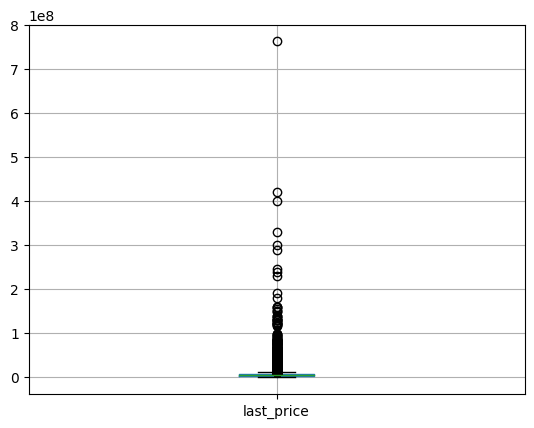

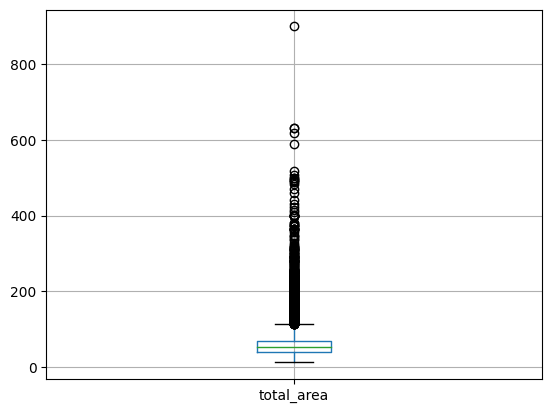

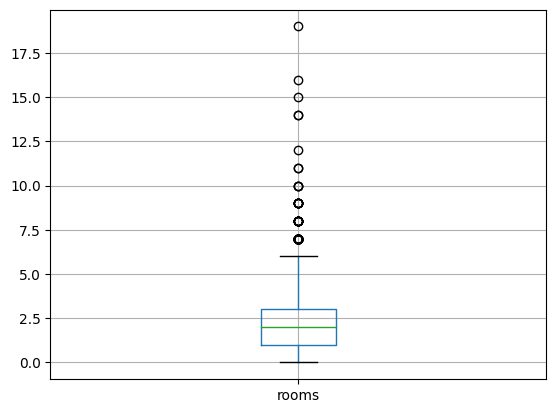

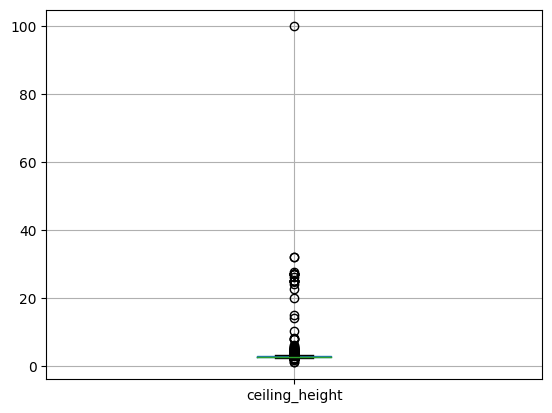

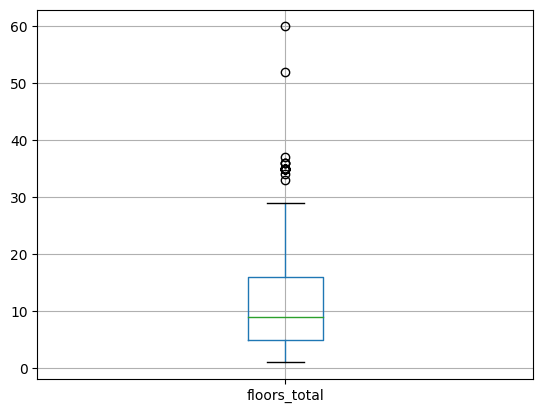

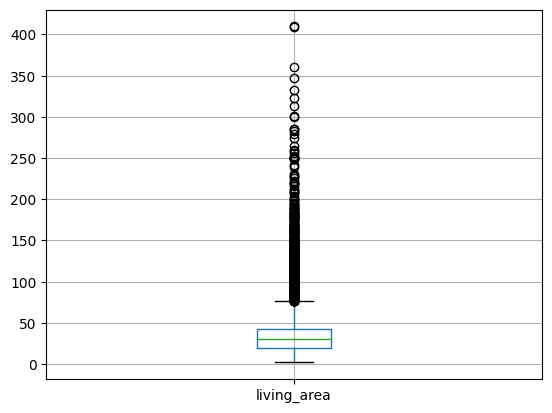

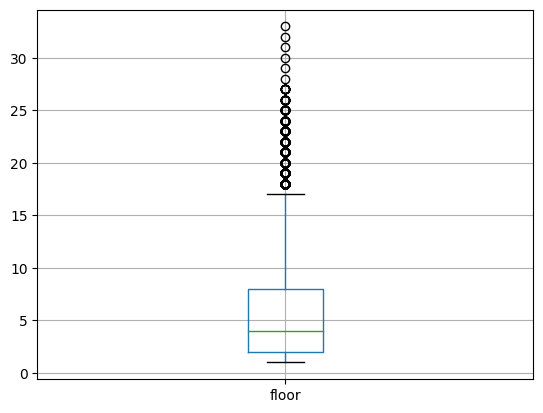

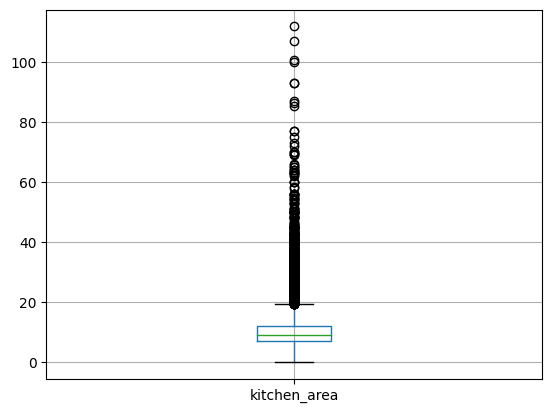

In [19]:
# let's select the parameters for which we have a substantial amount of data and then create box plots for visualization.
cols = ['last_price', 'total_area',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
        'kitchen_area']

for column in cols:
    plt.figure()
    data.boxplot([column])

In [20]:
# bringing abnormally large values of ceiling heights to standard ones
data.loc[data['ceiling_height'] > 25, 'ceiling_height'] = (data.loc[data['ceiling_height'] > 25, 'ceiling_height'] / 10).round(2)

For all the parameters analyzed, outliers are present. We will take this into account in our further analysis.

### Adding new columns

In [21]:
# calculating single square meter price
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['price_per_sqm'] = data['price_per_sqm'].astype('int')

In [22]:
# day posted
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [23]:
# month posted
data['month_exposition'] = data['first_day_exposition'].dt.month

In [24]:
# year posted
data['year_exposition'] = data['first_day_exposition'].dt.year

In [25]:
# floor type («первый» ("ground"), «последний» ("top"), «другой» ("other"))
def floor_id(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'


data['floor_type'] = data.apply(floor_id, axis = 1)

In [26]:
# distance to the city center (km)
data['city_center_distance'] = round(data['city_centers_nearest'] / 1000)

In [27]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,location,price_per_sqm,weekday_exposition,month_exposition,year_exposition,floor_type,city_center_distance
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.000000,8,NaN,...,2.0,755.0,NaN,Санкт-Петербург,120370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.75,11.0,18.600000,1,NaN,...,0.0,NaN,81.0,посёлок Шушары,82920,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.55,5.0,34.300000,4,NaN,...,2.0,574.0,558.0,Санкт-Петербург,92785,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.60,14.0,90.816647,9,NaN,...,3.0,234.0,424.0,Санкт-Петербург,408176,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.000000,13,NaN,...,1.0,48.0,121.0,Санкт-Петербург,100000,1,6,2018,другой,8.0


### Exploratory Data Analysis





#### Parameter Examination
Let's explore the statistical data for different parameters and create histograms.

##### Total Area

In [28]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

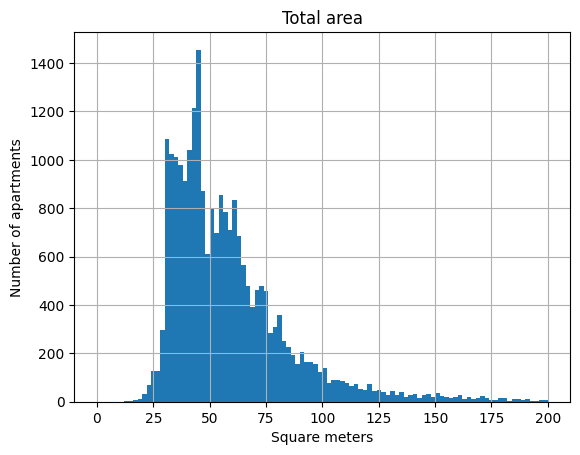

In [29]:
plt.hist(data['total_area'], bins=100, range=(0,200))
plt.title('Total area')
plt.xlabel('Square meters')
plt.ylabel('Number of apartments')
plt.grid(True)

The majority of apartments have an area in the range of 40-70 sq.m. The minimum area is 12 sq.m., and the maximum area is 900 sq.m.

##### Living area

In [30]:
data['living_area'].describe()

count    23565.000000
mean        34.592277
std         22.373679
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

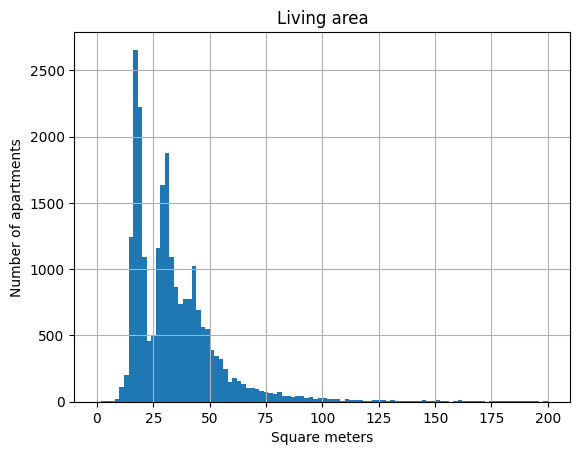

In [31]:
plt.hist(data['living_area'], bins=100, range=(0,200))
plt.title('Living area')
plt.xlabel('Square meters')
plt.ylabel('Number of apartments')
plt.grid(True)

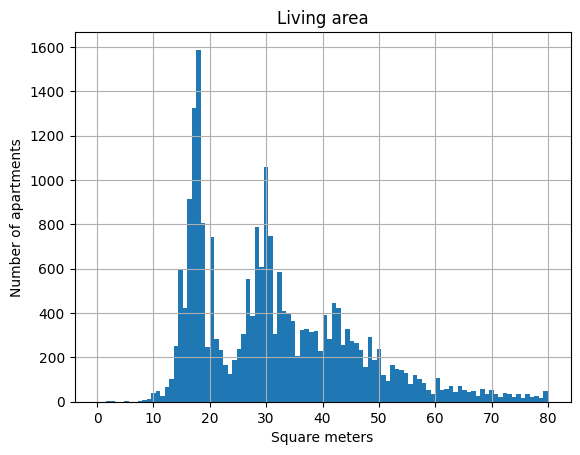

In [32]:
plt.hist(data['living_area'], bins=100, range=(0,80))
plt.title('Living area')
plt.xlabel('Square meters')
plt.ylabel('Number of apartments')
plt.grid(True)

It can be observed that there are peaks in the number of apartments with a living area of 17, 30, and 42 sq.m.

##### Kitchen area

In [33]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.433570
std          6.079614
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

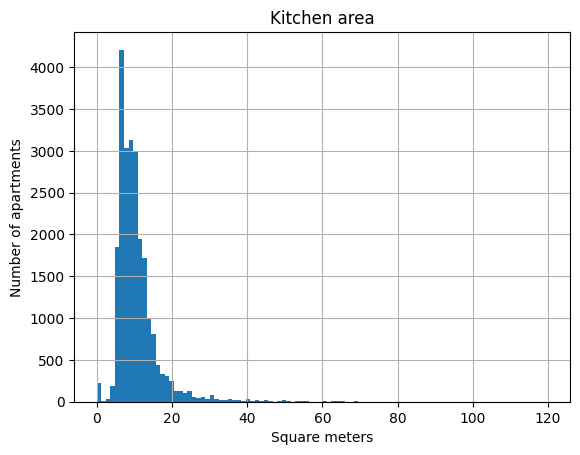

In [34]:
plt.hist(data['kitchen_area'], bins=100, range=(0,120))
plt.title('Kitchen area')
plt.xlabel('Square meters')
plt.ylabel('Number of apartments')
plt.grid(True)

Median kitchen area value is 9 square meters.

##### Price

In [35]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

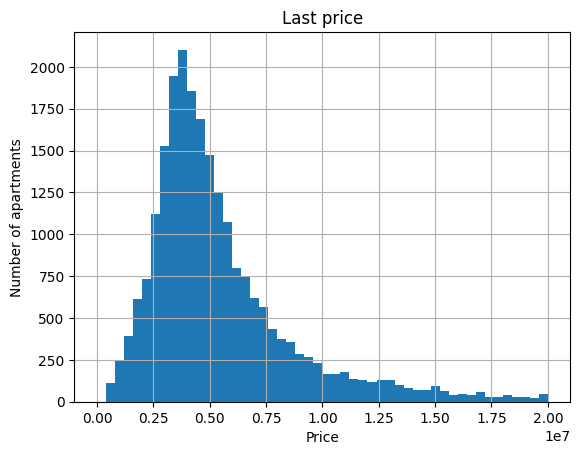

In [36]:
plt.hist(data['last_price'], bins=50, range=(0,20000000))
plt.title('Last price')
plt.xlabel('Price')
plt.ylabel('Number of apartments')
plt.grid(True)

Majority of the apartments cost around 4,6 million.

##### Rooms

In [37]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

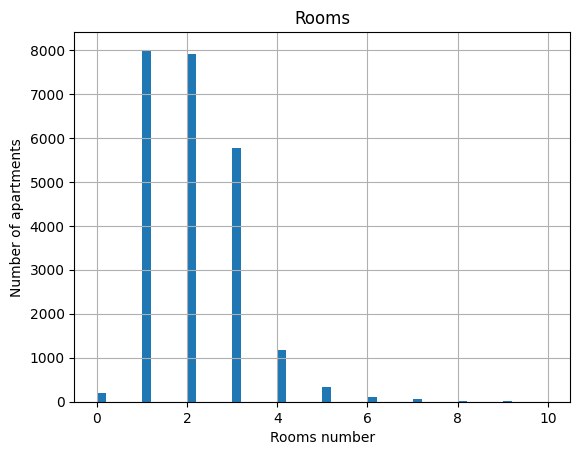

In [38]:
plt.hist(data['rooms'], bins=50, range=(0,10))
plt.title('Rooms')
plt.xlabel('Rooms number')
plt.ylabel('Number of apartments')
plt.grid(True)

One-bedroom and two-bedroom apartments are almost equally represented in the data. Three-bedroom apartments are slightly less popular. Apartments with more than four rooms are scarce in the dataset.

##### Ceiling height

In [39]:
data['ceiling_height'].describe()

count    23564.000000
mean         2.719184
std          0.522461
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max         25.000000
Name: ceiling_height, dtype: float64

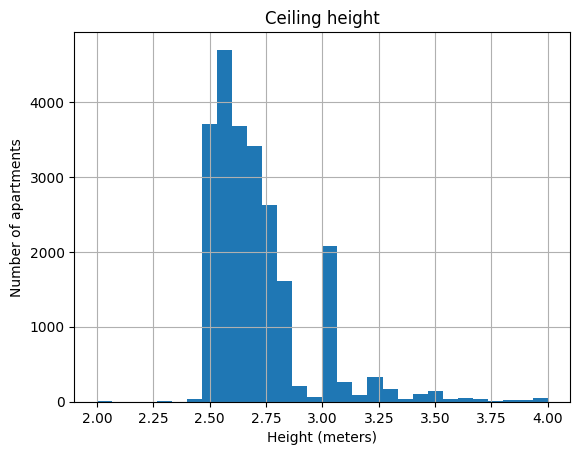

In [40]:
plt.hist(data['ceiling_height'], bins=30, range=(2,4))
plt.title('Ceiling height')
plt.xlabel('Height (meters)')
plt.ylabel('Number of apartments')
plt.grid(True)

75% of all the ceilings are under 2,7 meters.

##### Floor

In [41]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

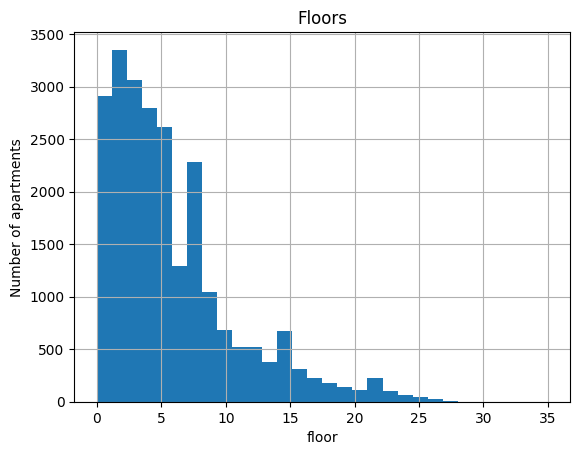

In [42]:
plt.hist(data['floor'], bins=30, range=(0,35))
plt.title('Floors')
plt.xlabel('floor')
plt.ylabel('Number of apartments')
plt.grid(True)

The majority of apartments in the dataset are located below the 9th floor. The highest number of apartments can be found on the 2nd and 3rd floors.

##### Floor type

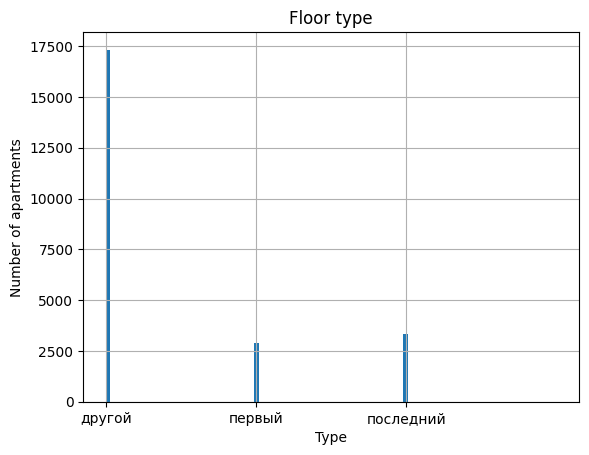

In [43]:
plt.hist(data['floor_type'], bins=100, range=(0,3))
plt.title('Floor type')
plt.xlabel('Type')
plt.ylabel('Number of apartments')
plt.grid(True)

There are more apartments on the top floor, than on the ground floor.

##### Total number of floors

In [44]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

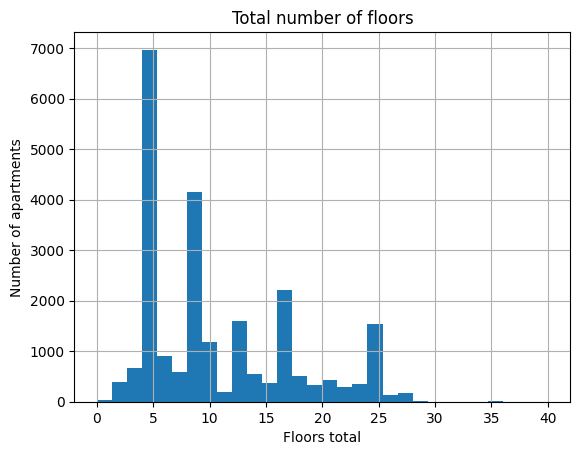

In [45]:
plt.hist(data['floors_total'], bins=30, range=(0,40))
plt.title('Total number of floors')
plt.xlabel('Floors total')
plt.ylabel('Number of apartments')
plt.grid(True)

The highest number of apartments is being sold in five-story and nine-story buildings. Among buildings with more than 20 floors, the most common category is 25-story buildings.

##### Distance to the city center in meters

In [46]:
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

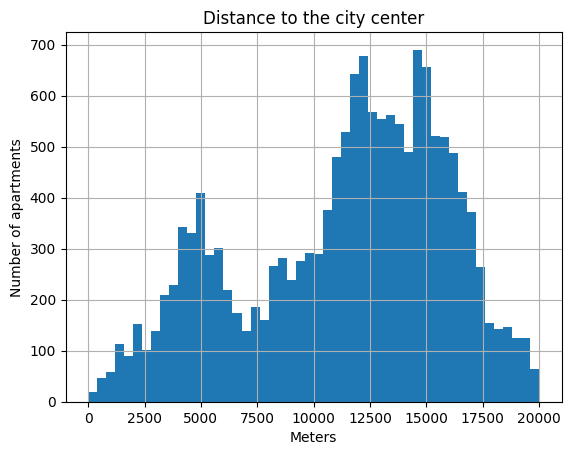

In [47]:
plt.hist(data['city_centers_nearest'], bins=50, range=(0,20000))
plt.title('Distance to the city center')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.grid(True)

We can observe significant peaks for distances at 15 km, 12 km, and 5 km from the city center.

##### Distance to the nearest airport

In [48]:
data['airports_nearest'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

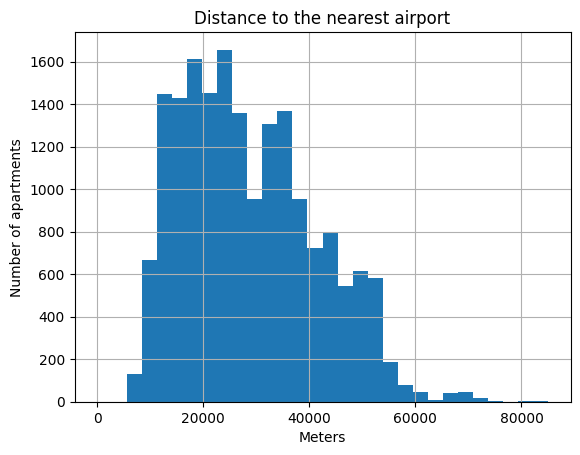

In [49]:
plt.hist(data['airports_nearest'], bins=30, range=(0,85000))
plt.title('Distance to the nearest airport')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.grid(True)

Majority of the apartments are 37 kilometers away from the nearest airport.

##### Distance to the nearest park

In [50]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

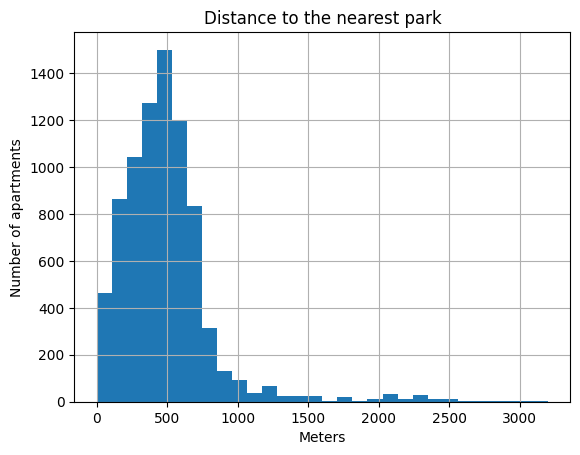

In [51]:
plt.hist(data['parks_nearest'], bins=30, range=(0,3200))
plt.title('Distance to the nearest park')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.grid(True)

Many apartments, for which data is available, are located within a radius of 600 meters from the nearest park. However, for most entries in the dataset, information for this parameter is not available.

##### Day and month of the publication

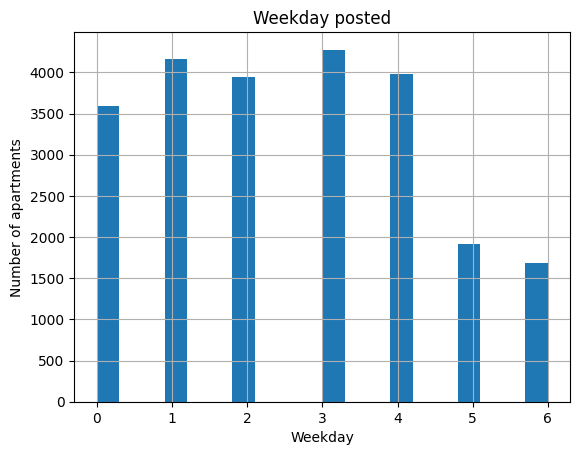

In [52]:
plt.hist(data['weekday_exposition'], bins=20, range=(0,6))
plt.title('Weekday posted')
plt.xlabel('Weekday')
plt.ylabel('Number of apartments')
plt.grid(True)

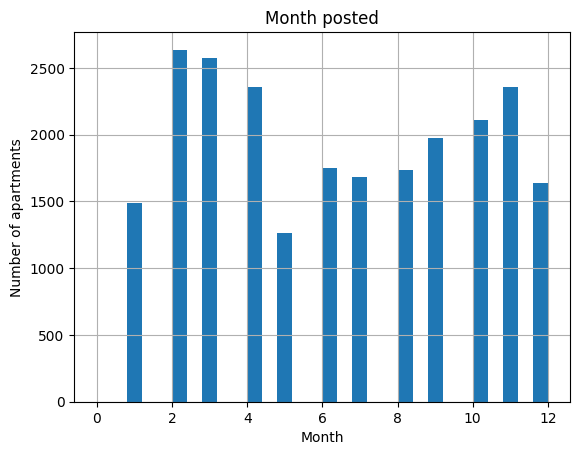

In [53]:
plt.hist(data['month_exposition'], bins=30, range=(0,12))
plt.title('Month posted')
plt.xlabel('Month')
plt.ylabel('Number of apartments')
plt.grid(True)

Most of the ads are published during the first half of the week, from February to April and from October to November.



#### Now let's analyze how quickly apartments are sold.
This parameter shows the number of days each ad was placed before it was sold.

In [54]:
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

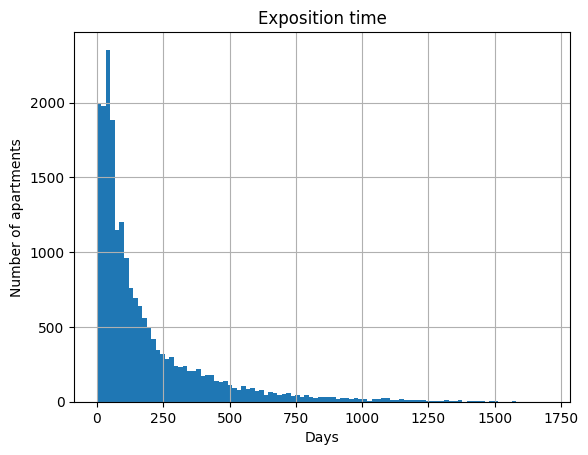

In [55]:
plt.hist(data['days_exposition'], bins=100, range=(0,1700))
plt.title('Exposition time')
plt.xlabel('Days')
plt.ylabel('Number of apartments')
plt.grid(True)

In [56]:
data['days_exposition'].median()

95.0

<Axes: >

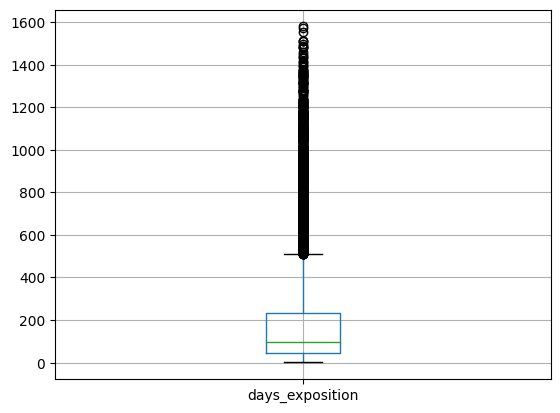

In [57]:
data.boxplot(column='days_exposition')

<Axes: >

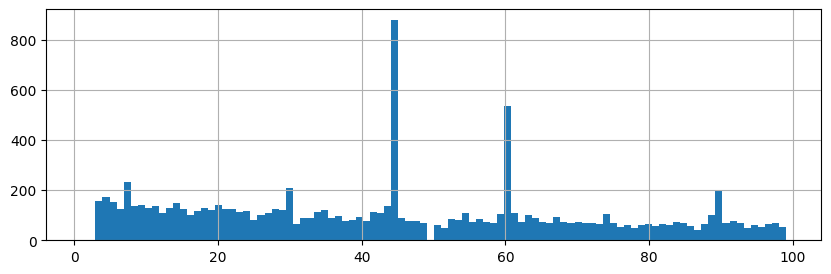

In [58]:
# taking a closer look at the outliers
data.query('days_exposition < 100')['days_exposition'].hist(bins=100, figsize=(10,3))

We can see clear spikes in ad removals at 45, 60, and 90 days after publication. If we study the terms of ad placement on the platform, we can conclude that these spikes are caused by the expiration of the ad period, rather than actual sales. https://yandex.ru/support/realty/owner/home/add-ads-housing.html

In [59]:
# percent of missing values
data['days_exposition'].isna().mean().round(4) * 100

13.459999999999999

On average, apartments are sold within 180 days. However, the most common selling time is around 3 months (median - 95 days). According to the box plot, selling periods longer than 500 days can be considered anomalous. The same can be said for apartments that are sold within the first 45 days. However, the overall picture is distorted due to artificial "spikes" caused by the conditions of ad placement on the platform. It's also worth noting that there are quite a few missing values (13%) in the selling periods.
    
    
    

According to the box plot, selling periods longer than 500 days can be considered anomalous. The same can be said for apartments that are sold within the first 45 days.



#### Which factors influence the total price of the property the most?

##### Total area

0.6536213939252806

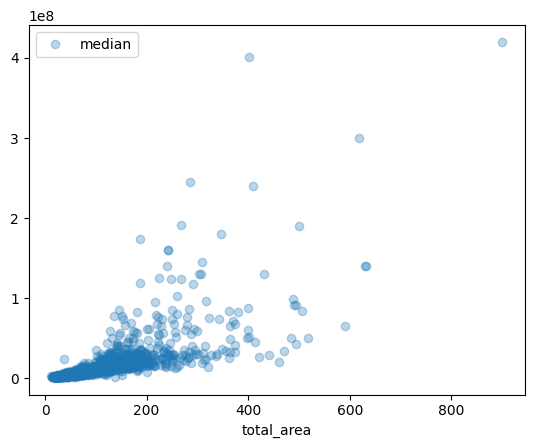

In [60]:
# creating new pivot table
area_price_pivot = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
area_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
area_price_pivot.plot(y='median', style = 'o', alpha=0.3)
# Pearson correlation coefficient
data['total_area'].corr(data['last_price'])

As the area increases, the price also increases; however, the correlation is not very strong, judging by the Pearson coefficient.

##### Living area

0.5856800386225619

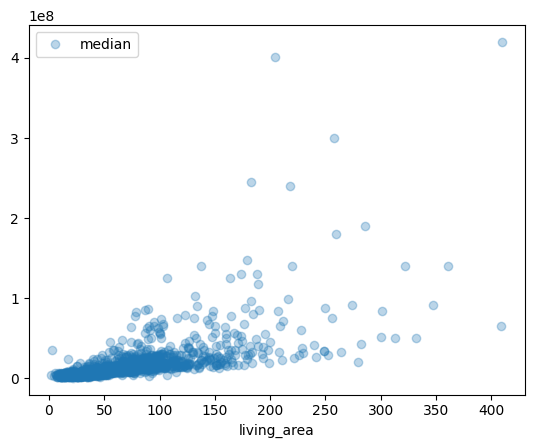

In [61]:
# creating new pivot table
living_area_price_pivot = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
living_area_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
living_area_price_pivot.plot(y='median', style = 'o', alpha=0.3)
# Pearson correlation coefficient
data['living_area'].corr(data['last_price'])

As the area increases, the price also increases, medium correlation.

##### Kitchen area

0.5082369207353034

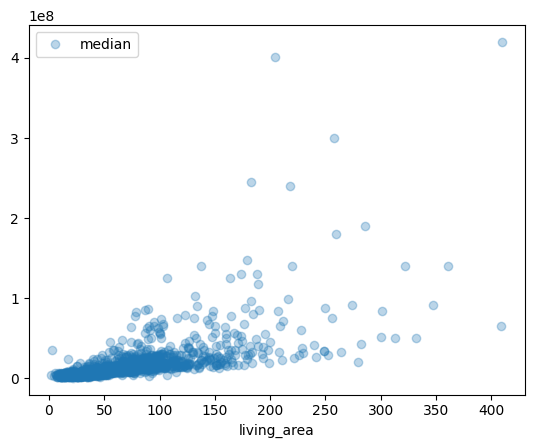

In [62]:
# creating new pivot table
kitchen_area_price_pivot = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
kitchen_area_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
living_area_price_pivot.plot(y='median', style = 'o', alpha=0.3)
# Pearson correlation coefficient
data['kitchen_area'].corr(data['last_price'])

We can see positive correlation as well.

##### Number of rooms

0.3631905485065748

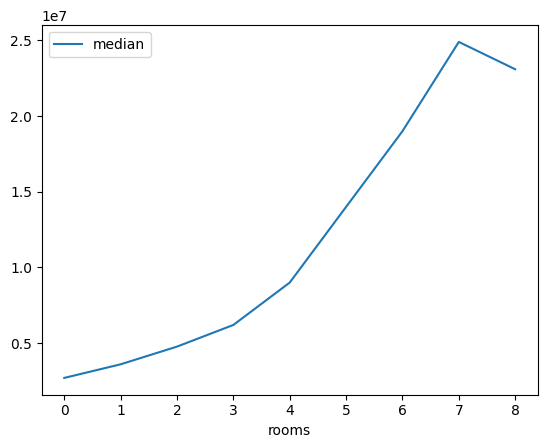

In [63]:
# creating new pivot table
rooms_price_pivot = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
rooms_price_pivot.query('count>10').plot(y = 'median')
# Pearson correlation coefficient
data['rooms'].corr(data['last_price'])

In [64]:
rooms_price_pivot.sort_values('count', ascending=False)

,mean,count,median
rooms,,,
1,3.833870e+06,8004,3600000
2,5.587257e+06,7897,4768714
3,8.174764e+06,5779,6200000
4,1.341792e+07,1172,9000000
5,2.379830e+07,325,14000000
0,3.344493e+06,194,2700000
6,3.188004e+07,104,19000000
7,5.147007e+07,59,24900000
8,5.022417e+07,12,23095000


The more rooms there are, the higher the price.

##### Floor type

<Axes: xlabel='floor_type'>

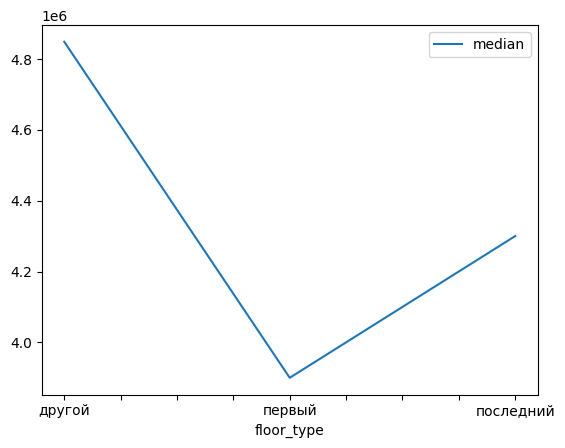

In [65]:
# creating new pivot table
floor_type_price_pivot = data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
floor_type_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
floor_type_price_pivot.plot(y = 'median')

Ground floor is the cheapest. Tope floor is cheaper than "other" floors.

##### Date posted

0.0013569211122710775

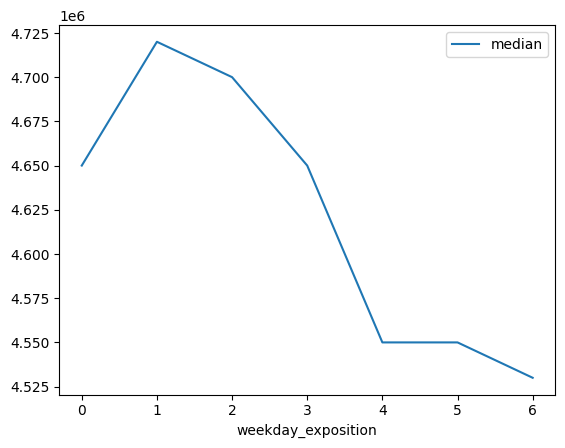

In [66]:
# creating new pivot table
weekday_price_pivot = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
weekday_price_pivot.plot(y = 'median')
# Pearson correlation coefficient
data['weekday_exposition'].corr(data['last_price'])

In [67]:
weekday_price_pivot.sort_values('count', ascending=False)

,mean,count,median
weekday_exposition,,,
3,6.706766e+06,4276,4650000
1,6.389281e+06,4163,4720000
4,6.359714e+06,3980,4550000
2,6.630246e+06,3948,4700000
0,6.518332e+06,3596,4650000
5,6.986165e+06,1919,4550000
6,6.242137e+06,1683,4530000


Prices are highest when listings are published on Tuesday and decrease towards the end of the week. If we assume that many listings are published by real estate agents, the decrease in price and the number of listings during weekends can be explained by the fact that mostly owners publish their listings during those days.

0.0027259571647347608

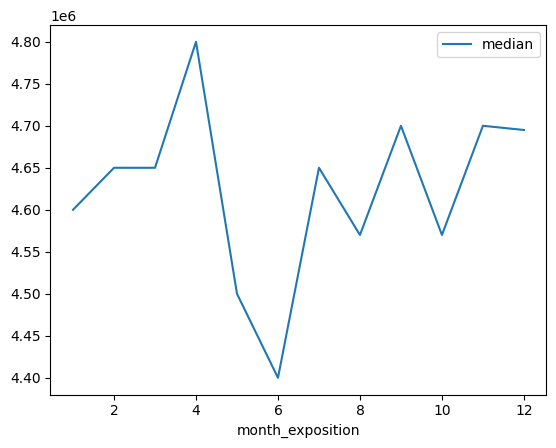

In [68]:
# creating new pivot table
month_price_pivot = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
month_price_pivot.plot(y = 'median')
# Pearson correlation coefficient
data['month_exposition'].corr(data['last_price'])

The most expensive apartments are posted in April, and the cheapest ones are posted in May-June. It is likely that by summer, the real estate market slows down due to the May holidays and the vacation season, resulting in fewer buyers, which leads to lower prices.

-0.042864152713611034

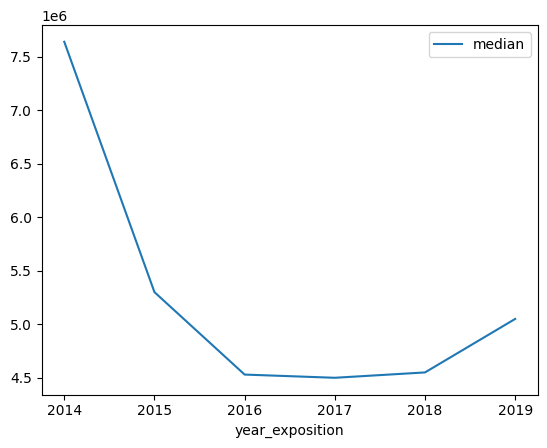

In [69]:
# creating new pivot table
year_price_pivot = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_price_pivot.columns = ['mean', 'count', 'median']
# scatterplot
year_price_pivot.plot(y = 'median')
#с Pearson correlation coefficient
data['year_exposition'].corr(data['last_price'])

The price drop after 2014 can be explained by an economic crisis in Russia, which was partially overcome by 2019.

Conclusion: As the area increases, the price also rises. The price also increases with the number of rooms. The first floor is cheaper than the top floor. Seasonality in the real estate market is observed: it is more advantageous to buy property in May and June, while selling at a higher price can be done in April. During economic downturns, the housing prices predictably decrease.



#### Let's calculate the average price per square meter in the 10 localities with the highest number of ads.
We will identify the localities with the highest and lowest price per square meter. This information can be found based on the names in the "locality_name" column.

In [70]:
location_price_pivot = data.pivot_table(index='location', values='price_per_sqm', aggfunc=['count', 'mean'])
location_price_pivot.columns = ['count', 'mean']
location_price_pivot = location_price_pivot.sort_values('count', ascending=False).head(10)

print(location_price_pivot[location_price_pivot['mean']==location_price_pivot['mean'].max()])
location_price_pivot[location_price_pivot['mean']==location_price_pivot['mean'].min()]

                 count           mean
location                             
Санкт-Петербург  15651  114868.433902


,count,mean
location,,
Выборг,237,58141.489451


Among the 10 localities with the highest number of real estate ads, properties are the most expensive in Saint Petersburg, and the cheapest in Vyborg.

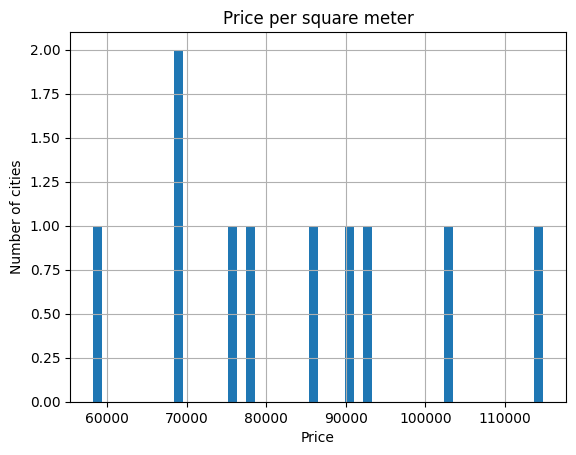

In [71]:
plt.hist(location_price_pivot['mean'], bins=50)
plt.title('Price per square meter')
plt.xlabel('Price')
plt.ylabel('Number of cities')
plt.grid(True)

#### Calculating mean price of each kilometer for apartments in Saint-Petersburg

<Axes: xlabel='city_center_distance'>

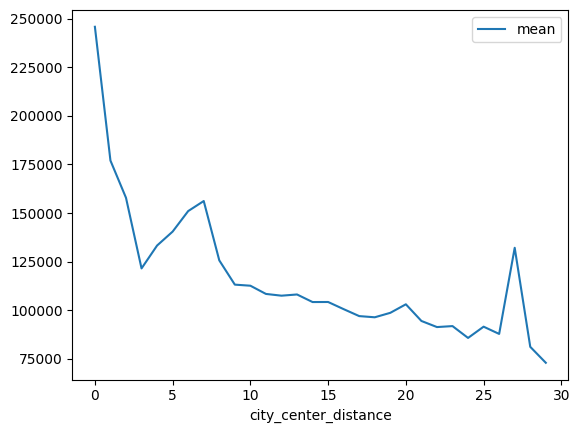

In [72]:
distance_price_pivot = data.query('(location == "Санкт-Петербург") and ~(location.isna())').pivot_table(index='city_center_distance', values='price_per_sqm', aggfunc=['count', 'mean'])
distance_price_pivot.columns = ['count', 'mean']
distance_price_pivot.plot(y = 'mean')

In [73]:
# suburbs with expensive properties
data.query('city_center_distance==27')['location'].unique()

array(['Пушкин', 'посёлок Металлострой', 'Санкт-Петербург',
       'посёлок Петро-Славянка', 'посёлок Александровская',
       'Красное Село'], dtype=object)

The farther from the city center, the cheaper the real estate. However, there are peaks in property prices at around 7 km and 27 km from the center. On the outskirts, housing is priced at about one-third of the price in the center.

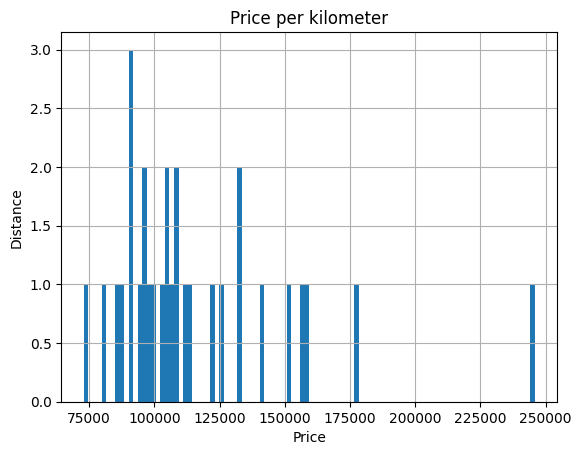

In [75]:
plt.hist(distance_price_pivot['mean'], bins=100)
plt.title('Price per kilometer')
plt.xlabel('Price')
plt.ylabel('Distance')
plt.grid(True)

### Conclusions

When building an automated system, the following should be taken into account:

1. Area is one of the most influential factors on the price. As the area of the apartment increases, its price also goes up. Anomalies can be considered apartments with a total area less than 20 sq.m. and greater than 150 sq.m. It's also important to carefully consider listings with kitchen areas outside the range of 6-15 sq.m.

2. The number of rooms directly affects the price. Anomalies can be observed for prices below 1,200,000 and above 12,000,000. One-bedroom apartments tend to have the highest price per square meter, while three-bedroom apartments are relatively cheaper compared to other common options.

3. Another significant factor is the floor level of the apartment. Apartments on the first floor are cheaper than those on other floors, while top-floor apartments are more expensive than first-floor ones but cheaper than those on intermediate floors. Floors above 25 are a rarity. Most apartments are sold in five-story buildings and nine-story buildings.

4. The farther from the city center, the cheaper the property, and the price on the outskirts can be significantly lower. The majority of selling apartments are located within 15 km from the city center and within 37 km from the nearest airport.

5. Properties that take more than 500 days to sell can be considered anomalies. The same can be said for apartments that sell within the first 45 days. Trends related to the publication date can also be observed: the cheapest properties are found in listings published on weekends, in May, and in June, while the most expensive ones are in April. During economic recessions, property prices tend to be lower compared to prosperous times.

6. Among the 10 localities with the highest number of listings, real estate is most expensive in St. Petersburg and cheapest in Vyborg.

**Recommendations**: Fields with a high number of missing values (e.g., information about nearby parks) should be made mandatory when posting listings. Developers should also automate the calculation of the distance of the apartment from the city center, nearest airport, park, and water body. Additionally, automatic removal of listings after 45, 60, and 90 days should be excluded from the data on sales speed.